In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

import warnings
warnings.filterwarnings('ignore')

1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [6]:
# Загрузка датасета
df = fetch_california_housing()

# Преобразование данных в DataFrame
X = pd.DataFrame(data=df.data, columns=df.feature_names)
Y = df.target

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка качества модели с параметрами по умолчанию
mse_default = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) с параметрами по умолчанию: {mse_default}")

# Изменение гиперпараметров модели
model.fit(X_train, y_train)  # Сбросим модель

# Изменение параметра fit_intercept
model.fit_intercept = False
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_no_intercept = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) без интерсепта: {mse_no_intercept}")

# Изменение параметра normalize
model.fit_intercept = True
model.normalize = True
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_normalized = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) с нормализацией: {mse_normalized}")

# Изменение параметра n_jobs
model.normalize = False
model.n_jobs = 2  # Измените количество ядер CPU по своей системе
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_n_jobs = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE) с измененным n_jobs: {mse_n_jobs}")

Среднеквадратичная ошибка (MSE) с параметрами по умолчанию: 0.5558915986952444
Среднеквадратичная ошибка (MSE) без интерсепта: 0.6294468701964703
Среднеквадратичная ошибка (MSE) с нормализацией: 0.5558915986952444
Среднеквадратичная ошибка (MSE) с измененным n_jobs: 0.5558915986952444


2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:
* Метод опорных векторов
 - Без ядра
 - С гауссовым ядром
 - С полиномиальным ядром
* Метод ближайших соседей
* Многослойный перцептрон
* Дерево решений
* Другие методы:
  - Гребневую регрессию
  - Регрессию Лассо
  - Регрессию ElasticNet
  - Случайный лес
  - Беггинг

Линейная регрессия - Среднеквадратичная ошибка (MSE): 0.5558915986952444


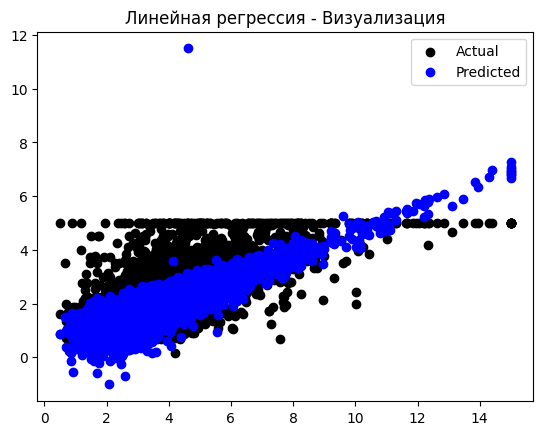

Метод опорных векторов без ядра - Среднеквадратичная ошибка (MSE): 4.7841759870684255


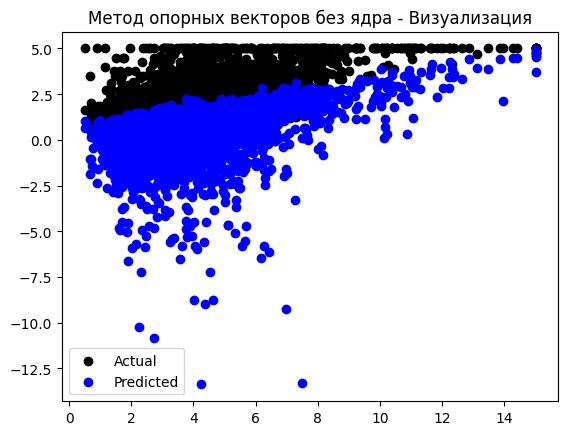

Метод опорных векторов с гауссовым ядром - Среднеквадратичная ошибка (MSE): 1.3320115421348744


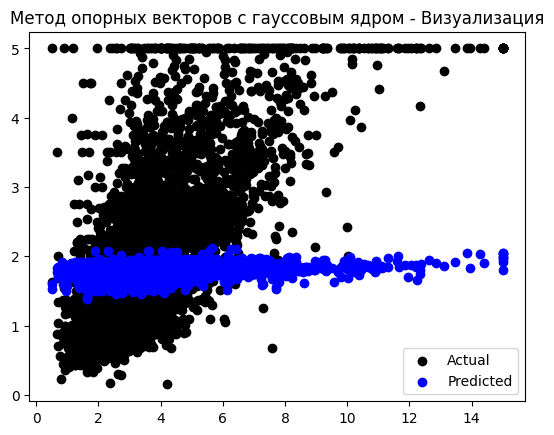

Метод опорных векторов с полиномиальным ядром - Среднеквадратичная ошибка (MSE): 1.348607592075733


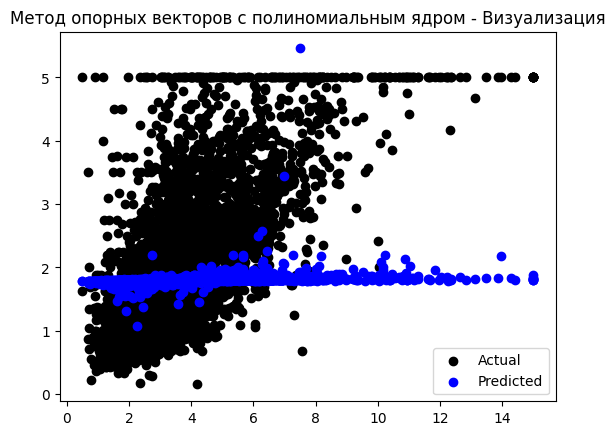

Метод ближайших соседей - Среднеквадратичная ошибка (MSE): 1.1186823858768293


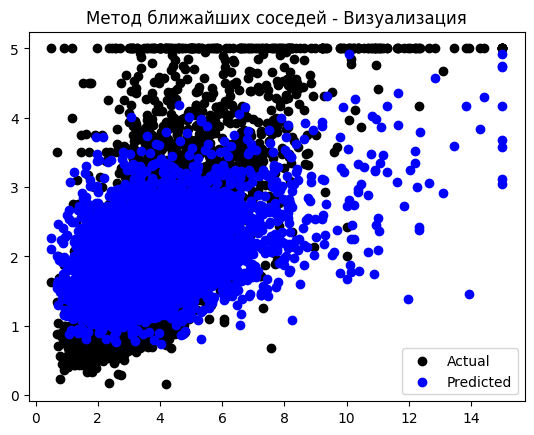

Многослойный перцептрон - Среднеквадратичная ошибка (MSE): 0.6369259844582972


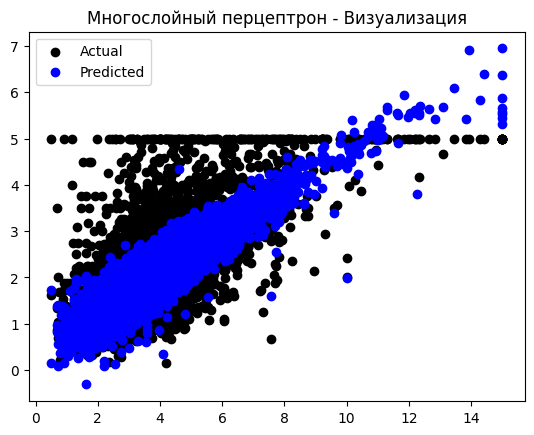

Дерево решений - Среднеквадратичная ошибка (MSE): 0.49418493189820734


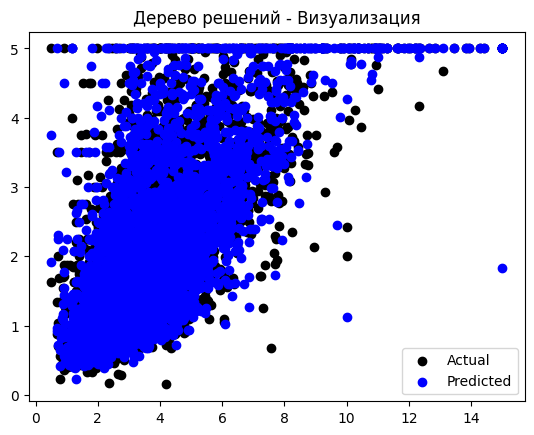

Случайный лес - Среднеквадратичная ошибка (MSE): 0.25496962944997653


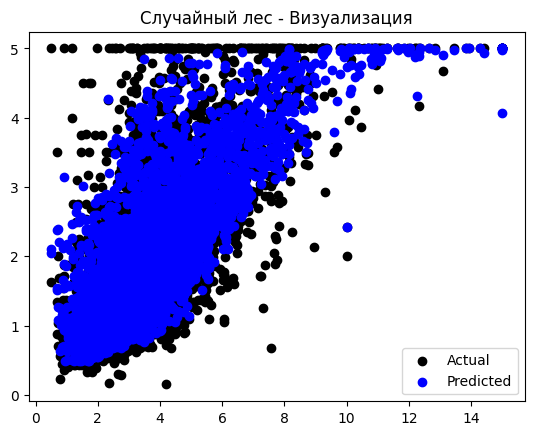

Беггинг - Среднеквадратичная ошибка (MSE): 0.2799385802237437


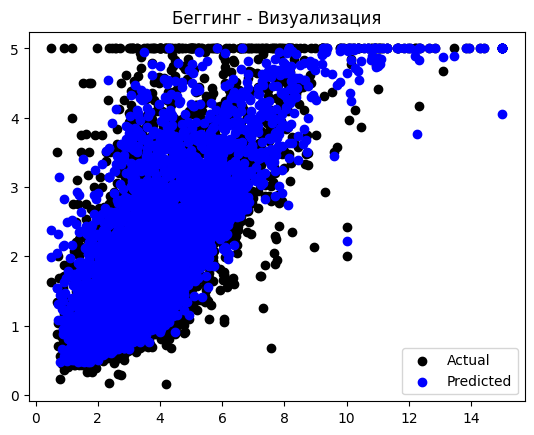

Гребневую регрессию - Среднеквадратичная ошибка (MSE): 0.5558034669932211


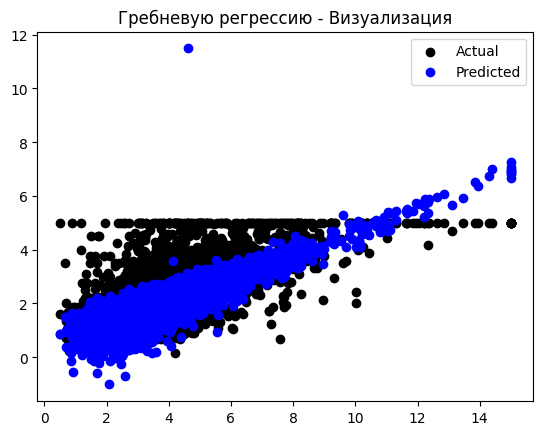

Регрессию Лассо - Среднеквадратичная ошибка (MSE): 0.9380337514945427


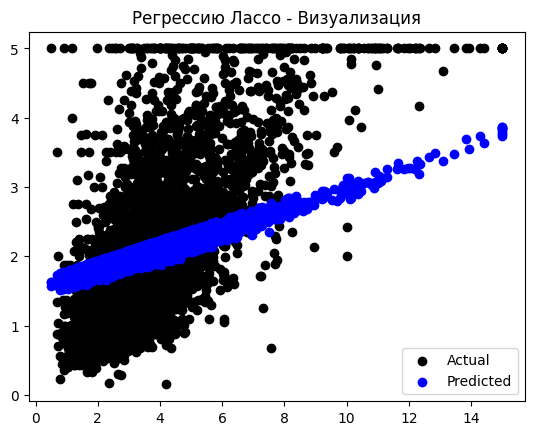

Регрессию ElasticNet - Среднеквадратичная ошибка (MSE): 0.7645556403971131


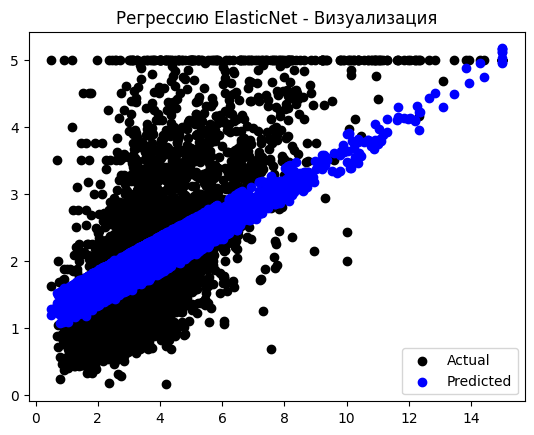

In [4]:
# Создание и обучение моделей
models = [
    ("Линейная регрессия", LinearRegression()),
    ("Метод опорных векторов без ядра", LinearSVR()),
    ("Метод опорных векторов с гауссовым ядром", SVR(kernel="rbf")),
    ("Метод опорных векторов с полиномиальным ядром", SVR(kernel="poly")),
    ("Метод ближайших соседей", KNeighborsRegressor(n_neighbors=5)),
    ("Многослойный перцептрон", MLPRegressor(max_iter=1000)),
    ("Дерево решений", DecisionTreeRegressor()),
    ("Случайный лес", RandomForestRegressor()),
    ("Беггинг", BaggingRegressor(estimator=DecisionTreeRegressor())),
    ("Гребневую регрессию", Ridge()),
    ("Регрессию Лассо", Lasso()),
    ("Регрессию ElasticNet", ElasticNet())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Оценка качества модели
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Среднеквадратичная ошибка (MSE): {mse}")

    # Визуализация регрессии (в примере для одной переменной)
    plt.scatter(X_test["MedInc"], y_test, color='black', label='Actual')
    plt.scatter(X_test["MedInc"], y_pred, color='blue', label='Predicted')
    plt.title(f"{name} - Визуализация")
    plt.legend()
    plt.show()

3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [7]:
def evaluate_models(dataset, models):
    # Загрузка датасета и подготовка данных
    df = dataset
    X = pd.DataFrame(data=df.data, columns=df.feature_names)
    Y = df.target
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    results = {}
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Оценка качества модели
        mse = mean_squared_error(y_test, y_pred)
        results[name] = mse

    return results

model_evaluations = evaluate_models(dataset=fetch_california_housing(), models=models)
for model, mse in model_evaluations.items():
    print(f"{model} - Среднеквадратичная ошибка (MSE): {mse}")

Линейная регрессия - Среднеквадратичная ошибка (MSE): 0.5558915986952444
Метод опорных векторов без ядра - Среднеквадратичная ошибка (MSE): 0.9898450113797239
Метод опорных векторов с гауссовым ядром - Среднеквадратичная ошибка (MSE): 1.3320115421348744
Метод опорных векторов с полиномиальным ядром - Среднеквадратичная ошибка (MSE): 1.348607592075733
Метод ближайших соседей - Среднеквадратичная ошибка (MSE): 1.1186823858768293
Многослойный перцептрон - Среднеквадратичная ошибка (MSE): 0.5626358718252608
Дерево решений - Среднеквадратичная ошибка (MSE): 0.503971827804215
Случайный лес - Среднеквадратичная ошибка (MSE): 0.2534657012244253
Беггинг - Среднеквадратичная ошибка (MSE): 0.2814840076944731
Гребневую регрессию - Среднеквадратичная ошибка (MSE): 0.5558034669932211
Регрессию Лассо - Среднеквадратичная ошибка (MSE): 0.9380337514945427
Регрессию ElasticNet - Среднеквадратичная ошибка (MSE): 0.7645556403971131


4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [9]:
model_evaluations = evaluate_models(dataset=load_diabetes(), models=models)
for model, mse in model_evaluations.items():
    print(f"{model} - Среднеквадратичная ошибка (MSE): {mse}")

Линейная регрессия - Среднеквадратичная ошибка (MSE): 2900.193628493482
Метод опорных векторов без ядра - Среднеквадратичная ошибка (MSE): 6737.923217644344
Метод опорных векторов с гауссовым ядром - Среднеквадратичная ошибка (MSE): 4333.285954518086
Метод опорных векторов с полиномиальным ядром - Среднеквадратичная ошибка (MSE): 3803.044078274641
Метод ближайших соседей - Среднеквадратичная ошибка (MSE): 3019.075505617978
Многослойный перцептрон - Среднеквадратичная ошибка (MSE): 3225.865849981278
Дерево решений - Среднеквадратичная ошибка (MSE): 4567.797752808989
Случайный лес - Среднеквадратичная ошибка (MSE): 2999.643498876404
Беггинг - Среднеквадратичная ошибка (MSE): 3334.0106741573036
Гребневую регрессию - Среднеквадратичная ошибка (MSE): 3077.41593882723
Регрессию Лассо - Среднеквадратичная ошибка (MSE): 3403.5757216070733
Регрессию ElasticNet - Среднеквадратичная ошибка (MSE): 5311.21282167187
